In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

csv_file="school-shootings-data.csv"
sch_shooting=pd.read_csv(csv_file)
sch_shooting.head()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,80480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.6,9,12,41.0,Jefferson County,8,8059,21.0
1,2,2.20054E+11,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.0,6,8,495.0,East Baton Rouge Parish,22,22033,12.0
2,3,1.30441E+11,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.0,9,12,125.0,Rockdale County,13,13247,21.0
3,4,4.21899E+11,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.0,9,12,2007.0,Philadelphia County,42,42101,11.0
4,5,2.50279E+11,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,NaN,9,12,543.0,Suffolk County,25,25025,11.0


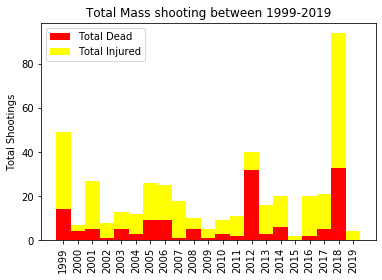

In [36]:
# How manymass shooting per year
school_shooting=pd.DataFrame(sch_shooting)

# total per year
shc_year=school_shooting.groupby("year")
years=school_shooting["year"].unique()
total_shooting=shc_year["date"].count()

# total per year of killed and injured
total_dead=shc_year["killed"].sum()
array_total=np.array(total_dead).astype(float)
total_injured=shc_year["injured"].sum()
total_enroll=shc_year["enrollment"].sum()

df_years=pd.DataFrame({"Total Shootings":total_shooting, "Total Dead":total_dead, 
                       "Total Injured":total_injured, "Total Enrollment":total_enroll})

# bar graph
# plt.bar(years, total_dead, color="green", edgecolor="white", width=.5)
# plt.bar(years, total_injured, color="yellow", bottom=total_dead, edgecolor="white", width=.5)

plt.bar(years, array_total, color="red", width=1, label="Total Dead")
plt.bar(years, total_injured, color="yellow", bottom=array_total,width=1,label="Total Injured")
plt.xticks(years,  rotation='vertical')
plt.ylabel('Total Shootings')
plt.title('Total Mass shooting between 1999-2019')

plt.legend()
plt.show()

In [19]:
# 11 City, Large Territory inside an urbanized area and inside a principal city with population of 250,000 or more.
# 12 City, Mid-size Territory inside an urbanized area and inside a principal city with a population less than 250,000 and greater than or equal to 100,000.
# 13 City, Small Territory inside an urbanized area and inside a principal city with a population less than 100,000.
# 21 Suburb, Large Territory outside a principal city and inside an urbanized area with population of 250,000 or more.
# 22 Suburb, Mid-size Territory outside a principal city and inside an urbanized area with a population less than 250,000 and greater than or equal to 100,000.
# 23 Suburb, Small Territory outside a principal city and inside an urbanized area with a population less than 100,000.
# 31 Town, Fringe Territory inside an urban cluster that is less than or equal to 10 miles from an urbanized area.
# 32 Town, Distant Territory inside an urban cluster that is more than 10 miles and less than or equal to 35 miles from an urbanized area.
# 33 Town, Remote Territory inside an urban cluster that is more than 35 miles from an urbanized area.
# 41 Rural, Fringe Census-defined rural territory that is less than or equal to 5 miles from an urbanized area, as well as rural territory that is less than or equal to 2.5 miles from an urban cluster.
# 42 Rural, Distant Census-defined rural territory that is more than 5 miles but less than or equal to 25 miles from an urbanized area, as well as rural territory that is more than 2.5 miles but less than or equal to 10 miles from an urban cluster.
# 43 Rural, Remote Census-defined rural territory that is more than 25 miles from an urbanized area and is also more than 10 miles from an urban cluster.

school_location=school_shooting.groupby("ulocale")

# shootingd oer area
area= school_location["ulocale"].count()

city= area[11.0]+area[12.0]+area[13.0]
suburd= area[21.0]+area[22.0]+area[23.0]
town= area[31.0]+area[32.0]+area[33.0]
rural= area[41.0]+area[42.0]+area[43.0]

# total enrolment of the areas
area_pop= school_location["enrollment"].sum()
area_mean= school_location["enrollment"].mean()

city_pop= area_pop[11.0]+area_pop[12.0]+area_pop[13.0]
suburd_pop= area_pop[21.0]+area_pop[22.0]+area_pop[23.0]
town_pop= area_pop[31.0]+area_pop[32.0]+area_pop[33.0]
rural_pop= area_pop[41.0]+area_pop[42.0]+area_pop[43.0]

city_ave= (area_mean[11.0]+area_mean[12.0]+area_mean[13.0])/3
suburd_ave= (area_mean[21.0]+area_mean[22.0]+area_mean[23.0])/3
town_ave= (area_mean[31.0]+area_mean[32.0]+area_mean[33.0])/3
rural_ave= (area_mean[41.0]+area_mean[42.0]+area_mean[43.0])/3

# ratio pased on the city shootings pre class size of the school shotings
city_ratio=city/city_pop*100
suburd_ratio=city/suburd_pop*100
town_ratio=city/town_pop*100
rural_ratio=city/rural_pop*100

city_mean=city/city_ave*100
suburd_mean=city/suburd_ave*100
town_mean=city/town_ave*100
rural_mean=city/rural_ave*100

df_area=pd.DataFrame({"Areas":["city","suburd","town","rural"], "Total shootings":[city,suburd,town,rural], 
                          "Total Enrollment":[city_pop,suburd_pop,town_pop,rural_pop],
                      "Averge Enrollment":[city_ave,suburd_ave,town_ave,rural_ave],
                     "Shooting Enrollment ratio":[city_ratio,suburd_ratio,town_ratio,rural_ratio],
                     "Shooting Enrollment Mean":[city_mean,suburd_mean,town_mean,rural_mean]})

df_area_index=df_area.set_index("Areas")
df_area_index



,Total shootings,Total Enrollment,Averge Enrollment,Shooting Enrollment ratio,Shooting Enrollment Mean
Areas,,,,,
city,111,117671,1005.040897,0.094331,11.044327
suburd,65,90074,1332.313636,0.123232,8.331372
town,26,20541,828.083333,0.540383,13.404448
rural,34,28166,612.805556,0.394092,18.113413


Text(0.5, 1.0, 'Total Mass Shooting Per Area')

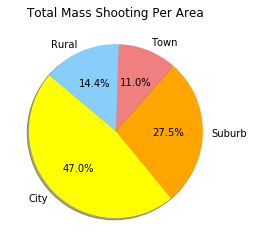

In [68]:
labels=["City","Suburb","Town","Rural"]
size=[city,suburd,town,rural]
Colors= ["yellow", "orange", "lightcoral", "lightskyblue"]
plt.pie(size,labels=labels, colors=Colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Total Mass Shooting Per Area')

In [ ]:
plt.bar(area, array_total, color="red", width=1, label="Total Dead")
plt.xticks(years,  rotation='vertical')
plt.ylabel('Total Shootings')
plt.title('Total Mass shooting between 1999-2019')

plt.legend()
plt.show()

In [ ]:
# bar graph of the total average


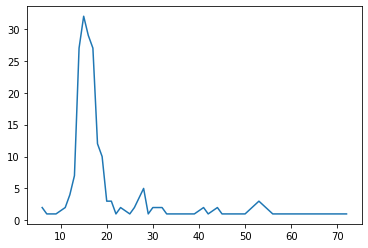

In [78]:
shc_age=school_shooting.groupby("age_shooter1")
total_ageX=shc_age["age_shooter1"].unique()
total_age=shc_age["age_shooter1"].count()
plt.plot(total_ageX,total_age)